In [1]:
%%time
import malaya

CPU times: user 4.46 s, sys: 887 ms, total: 5.35 s
Wall time: 4.82 s


## GPT2

Malaya provided Pretrained GTP2 model, specific to Malay, we called it GTP2-Bahasa. This interface not able us to use it to do custom training.

GPT2-Bahasa was pretrained on ~0.9 billion words, and below is the list of dataset we trained,

1. [dumping wikipedia (222MB)](https://github.com/huseinzol05/Malaya-Dataset#wikipedia-1).
2. [local news (257MB)](https://github.com/huseinzol05/Malaya-Dataset#public-news).
3. [local parliament text (45MB)](https://github.com/huseinzol05/Malaya-Dataset#parliament).
4. [IIUM Confession (74MB)](https://github.com/huseinzol05/Malaya-Dataset#iium-confession).
5. [Wattpad (74MB)](https://github.com/huseinzol05/Malaya-Dataset#wattpad).
6. [Academia PDF (42MB)](https://github.com/huseinzol05/Malaya-Dataset#academia-pdf).
7. [Common-Crawl (3GB)](https://github.com/huseinzol05/malaya-dataset#common-crawl).

If you want to download pretrained model for GPT2-Bahasa and use it for custom transfer-learning, you can download it here, https://github.com/huseinzol05/Malaya/tree/master/pretrained-model/gpt2, some notebooks to help you get started.

**Here we hope these models are not use to finetune for spreading fake news**.

Or you can simply use [Transformers](https://huggingface.co/models?filter=malay&search=gpt2) to try GPT2-Bahasa models from Malaya, simply check available models from here, https://huggingface.co/models?filter=malay&search=gpt2

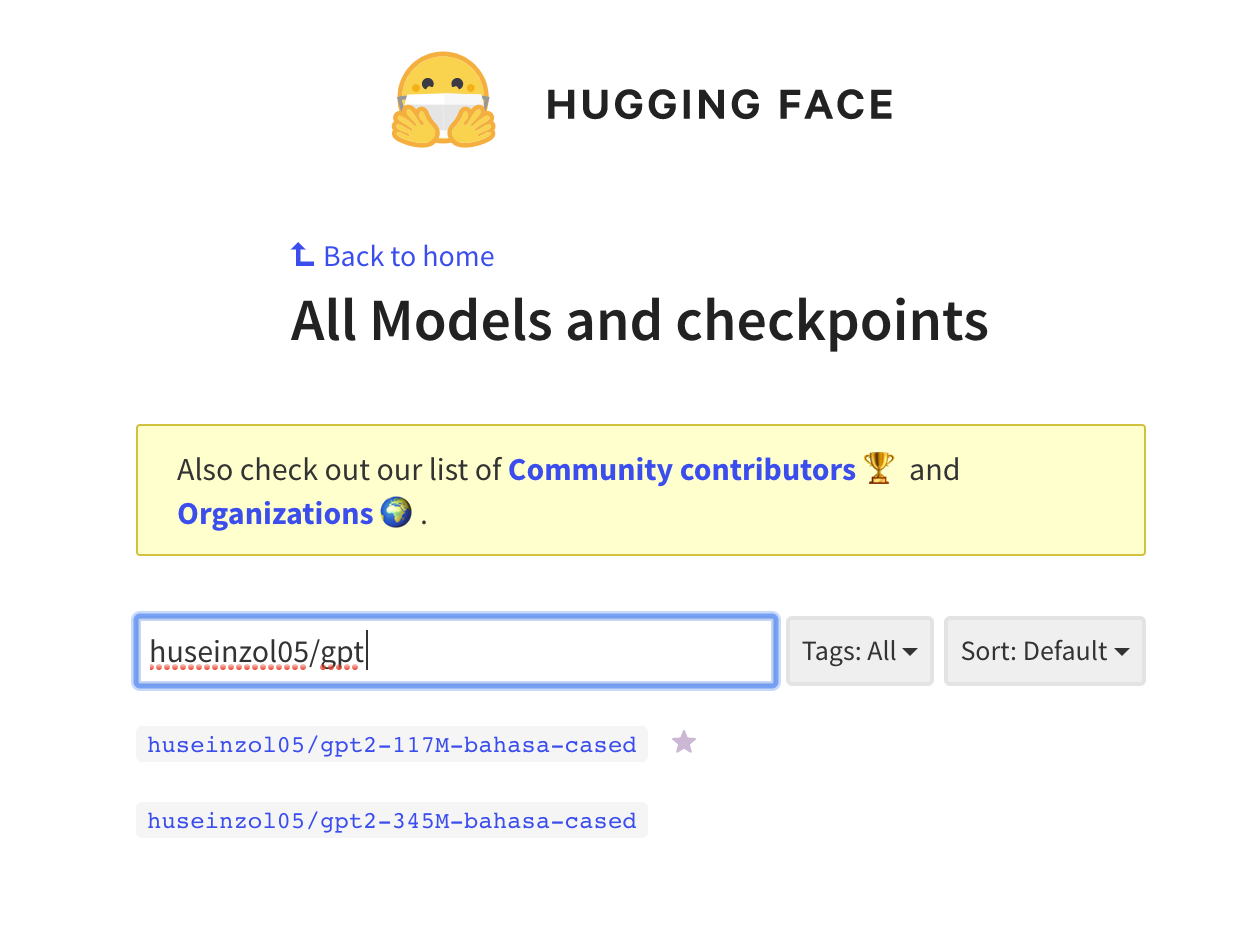

In [1]:
from IPython.core.display import Image, display

display(Image('gpt2.png', width=500))

#### load model

GPT2-Bahasa only available `117M` and `345M` models.

1. `117M` size around 442MB.
2. `345M` is around 1.2GB.

```python
def gpt2(
    model: str = '345M',
    generate_length: int = 256,
    temperature: float = 1.0,
    top_k: int = 40,
    **kwargs
):

    """
    Load GPT2 model to generate a string given a prefix string.

    Parameters
    ----------
    model : str, optional (default='345M')
        Model architecture supported. Allowed values:

        * ``'117M'`` - GPT2 117M parameters.
        * ``'345M'`` - GPT2 345M parameters.

    generate_length : int, optional (default=256)
        length of sentence to generate.
    temperature : float, optional (default=1.0)
        temperature value, value should between 0 and 1.
    top_k : int, optional (default=40)
        top-k in nucleus sampling selection.

    Returns
    -------
    result: malaya.transformers.gpt2.Model class
    """
```

In [3]:
model = malaya.generator.gpt2(model = '117M')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




INFO:tensorflow:Restoring parameters from /Users/huseinzolkepli/Malaya/gpt2/117M/gpt2-bahasa-117M/model.ckpt


In [4]:
string = 'ceritanya sebegini, aku bangun pagi baca surat khabar berita harian, tetiba aku nampak cerita seram, '

In [4]:
print(model.generate(string))

ceritanya sebegini, aku bangun pagi baca surat khabar berita harian, tetiba aku nampak cerita seram, ara aku yang lain keluar, aku pandang cerita tapi tak ingat, aku takut dan bimbang aku terpaksa marah kerana hati aku yang berada di sekeliling aku tadi tak putus-putus.
Dalam diam, aku juga merasa kagum dan terharu bila aku bangun pagi untuk bangun dan tengok kisah seram ni, masa tu aku terus pandang, bila aku berada dalam bilik yang indah, aku tahu tentang benda yang nak diperkatakan.
“Tu sikit, dengan banyak masa aku nak keluar dan keluar aku dah mula bangun pagi, aku nak keluar lagi, lepas tu nanti terus masuk ke bilik sambil nampak benda yang tak ada yang nak diperkatakan.
Tak tau cerita tu macam benda yang boleh aku buat kalau rasa macam cerita.
Sampai di bilik, aku pun rasa macam, benda yang nak diperkatakan tu bukan benda yang perlu aku buat.
Macam tak percaya apa yang aku buat ni?
Mungkin benda yang nak diperkatakan itu boleh buat aku jugak, cuma benda yang boleh bagi aku kata 

In [6]:
model = malaya.generator.gpt2(model = '345M')

INFO:tensorflow:Restoring parameters from /Users/huseinzolkepli/Malaya/gpt2/345M/gpt2-bahasa-345M/model.ckpt


In [7]:
string = 'ceritanya sebegini, aku bangun pagi baca surat khabar berita harian, tetiba aku nampak cerita seram, '
print(model.generate(string))

ceritanya sebegini, aku bangun pagi baca surat khabar berita harian, tetiba aku nampak cerita seram, omputeh-uteh cerita lama-lama, seram tak boleh bayang
Sebelum kejadian, dalam 2 jam aku buat panggilan polis , lepas tu kira la sendiri nak ke lokasi.
Tengok cerita lama..
Sekarang ni, apa yang aku lalui, kita yang jaga diri, kita yang jaga kesihatan dan juga kita yang jaga minda dalam hidup.
Maka, inilah jalan penyelesaian terbaiknya.
Jangan lupakan manusia
Orang yang paling ditakuti untuk berjaya dalam hidup, tidak akan jumpa yang tersayang!
Jangan rosakkan masa depannya, ingatlah apa yang kita nak buat, walaupun pahit untuk ditelan.
Jangan lupakan orang lain - masa depan mereka.
Jangan lupakan orang - masa itulah kita yang lebih dicintai.
Jangan lupakan orang - orang yang kita sayang, mereka bukan orang yang tersayang!
Jangan lupakan orang - orang yang kita cinta, mereka cinta pada kita.
Jangan lupakan diri - diri kita - yang kita punya, yang kita tinggal adalah masa lalu kita.
Janga

## Transformer

We also can generate a text like GPT2 using Transformer-Bahasa. Right now only supported BERT, ALBERT and ELECTRA.

```python
def transformer(
    string: str,
    model,
    generate_length: int = 30,
    leed_out_len: int = 1,
    temperature: float = 1.0,
    top_k: int = 100,
    burnin: int = 15,
    batch_size: int = 5,
):
    """
    Use pretrained transformer models to generate a string given a prefix string.
    https://github.com/nyu-dl/bert-gen, https://arxiv.org/abs/1902.04094

    Parameters
    ----------
    string: str
    model: object
        transformer interface object. Right now only supported BERT, ALBERT.
    generate_length : int, optional (default=256)
        length of sentence to generate.
    leed_out_len : int, optional (default=1)
        length of extra masks for each iteration. 
    temperature: float, optional (default=1.0)
        logits * temperature.
    top_k: int, optional (default=100)
        k for top-k sampling.
    burnin: int, optional (default=15)
        for the first burnin steps, sample from the entire next word distribution, instead of top_k.
    batch_size: int, optional (default=5)
        generate sentences size of batch_size.

    Returns
    -------
    result: List[str]
    """
```

In [2]:
electra = malaya.transformer.load(model = 'electra')


Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.random.categorical` instead.






INFO:tensorflow:Restoring parameters from /Users/huseinzolkepli/Malaya/electra-model/base/electra-base/model.ckpt


In [5]:
malaya.generator.transformer(string, electra)

['ceritanya sebegini , aku bangun pagi baca surat khabar berita harian , tetiba aku nampak cerita seram , seriuslah Allah tarik balik rezeki aku untuk kau berjumpa balik . patutlah terpentak apabila tiba masa kita baru perasan kejadian begitu , tapi nyata rupanya . Begitulah kehidupan',
 'ceritanya sebegini , aku bangun pagi baca surat khabar berita harian , tetiba aku nampak cerita seram , rupanya ada segelintir pihak yang tak faham bahasa Melayu berbalas budi . Kisah ringkas , Kisah ringkas , Kisah kisah ringkas , Kisah akhir cerita , Kisah kematian .',
 'ceritanya sebegini , aku bangun pagi baca surat khabar berita harian , tetiba aku nampak cerita seram , kenapa la cara bunuh diri tu mangkuk , orang baru terpengaruh dengan isu kononnya anak anak mangsa bunuh diri , mana tahu tau apa sebenar dosa orang itu sebenar .',
 'ceritanya sebegini , aku bangun pagi baca surat khabar berita harian , tetiba aku nampak cerita seram , diri yang gelap , menyedihkan , menyedihkan , remaja yang kay

## ngrams

You can generate ngrams pretty easy using this interface,

```python
def ngrams(
    sequence,
    n: int,
    pad_left = False,
    pad_right = False,
    left_pad_symbol = None,
    right_pad_symbol = None,
):
    """
    generate ngrams.

    Parameters
    ----------
    sequence : List[str]
        list of tokenize words.
    n : int
        ngram size

    Returns
    -------
    ngram: list
    """
```

In [6]:
string = 'saya suka makan ayam'

list(malaya.generator.ngrams(string.split(), n = 2))

[('saya', 'suka'), ('suka', 'makan'), ('makan', 'ayam')]

In [7]:
list(malaya.generator.ngrams(string.split(), n = 2, pad_left = True, pad_right = True))

[(None, 'saya'),
 ('saya', 'suka'),
 ('suka', 'makan'),
 ('makan', 'ayam'),
 ('ayam', None)]

In [8]:
list(malaya.generator.ngrams(string.split(), n = 2, pad_left = True, pad_right = True,
                            left_pad_symbol = 'START'))

[('START', 'saya'),
 ('saya', 'suka'),
 ('suka', 'makan'),
 ('makan', 'ayam'),
 ('ayam', None)]

In [8]:
list(malaya.generator.ngrams(string.split(), n = 2, pad_left = True, pad_right = True,
                            left_pad_symbol = 'START', right_pad_symbol = 'END'))

[('START', 'saya'),
 ('saya', 'suka'),
 ('suka', 'makan'),
 ('makan', 'ayam'),
 ('ayam', 'END')]